In [34]:
import pandas as pd
import scanpy as sc
import numpy as np

In [35]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.3 statsmodels==0.13.4 pynndescent==0.5.8


In [5]:
sc_tbl = pd.read_table("/home/meric/Desktop/single-cell-pathway-analysis/scripts/data/expression_matrix.tsv",index_col=0)

In [6]:
sc_tbl.head()

,midpoint_AAACCTGCACCCAGTG.1,midpoint_AAACCTGCAGCTTAAC.1,midpoint_AAACCTGGTGTGCGTC.1,midpoint_AAACCTGGTTGAACTC.1,midpoint_AAACGGGAGGATGGTC.1,midpoint_AAACGGGAGGGCTCTC.1,midpoint_AAACGGGAGTAACCCT.1,midpoint_AAACGGGCATGGGACA.1,midpoint_AAACGGGGTCTGCAAT.1,midpoint_AAACGGGTCAATCTCT.1,...,tumor_TTTATGCCAAGCCTAT.1,tumor_TTTATGCGTGCAGTAG.1,tumor_TTTATGCTCGCCTGAG.1,tumor_TTTCCTCCAAGTTCTG.1,tumor_TTTCCTCCACCAGTTA.1,tumor_TTTCCTCGTATGCTTG.1,tumor_TTTGCGCCACGGTTTA.1,tumor_TTTGGTTCAGCCTGTG.1,tumor_TTTGGTTCAGTGAGTG.1,tumor_TTTGGTTGTGCAACTT.1
Xkr4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sox17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mrpl15,0,0,0,0,0,0,1,0,0,0,...,3,3,0,6,2,1,2,4,10,2
Lypla1,0,0,1,0,1,0,0,0,0,0,...,1,2,0,1,0,2,2,4,6,2
Tcea1,0,0,0,0,0,0,0,0,1,2,...,2,1,0,1,2,1,5,2,2,1


In [108]:
sc_tbl

,midpoint_AAACCTGCACCCAGTG.1,midpoint_AAACCTGCAGCTTAAC.1,midpoint_AAACCTGGTGTGCGTC.1,midpoint_AAACCTGGTTGAACTC.1,midpoint_AAACGGGAGGATGGTC.1,midpoint_AAACGGGAGGGCTCTC.1,midpoint_AAACGGGAGTAACCCT.1,midpoint_AAACGGGCATGGGACA.1,midpoint_AAACGGGGTCTGCAAT.1,midpoint_AAACGGGTCAATCTCT.1,...,tumor_TTTATGCCAAGCCTAT.1,tumor_TTTATGCGTGCAGTAG.1,tumor_TTTATGCTCGCCTGAG.1,tumor_TTTCCTCCAAGTTCTG.1,tumor_TTTCCTCCACCAGTTA.1,tumor_TTTCCTCGTATGCTTG.1,tumor_TTTGCGCCACGGTTTA.1,tumor_TTTGGTTCAGCCTGTG.1,tumor_TTTGGTTCAGTGAGTG.1,tumor_TTTGGTTGTGCAACTT.1
Xkr4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sox17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mrpl15,0,0,0,0,0,0,1,0,0,0,...,3,3,0,6,2,1,2,4,10,2
Lypla1,0,0,1,0,1,0,0,0,0,0,...,1,2,0,1,0,2,2,4,6,2
Tcea1,0,0,0,0,0,0,0,0,1,2,...,2,1,0,1,2,1,5,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Slc18a2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Emx2os,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Spry3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
adata = sc.read("/home/meric/Desktop/single-cell-pathway-analysis/scripts/data/expression_matrix.tsv").T

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [19]:
adata

AnnData object with n_obs × n_vars = 4797 × 16894

In [116]:
meta = pd.read_table("/home/meric/Desktop/single-cell-pathway-analysis/scripts/data/meta_data.tsv",index_col=0)

In [13]:
meta.head()

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,RNA_snn_res.0.3,RNA_snn_res.0.5
midpoint_AAACCTGCACCCAGTG-1,midpoint_treated,2273,1042,4.047514,3.0,1,NaN,1
midpoint_AAACCTGCAGCTTAAC-1,midpoint_treated,2644,1036,3.933434,3.0,1,NaN,1
midpoint_AAACCTGGTGTGCGTC-1,midpoint_treated,8506,2325,4.067717,9.0,7,NaN,7
midpoint_AAACCTGGTTGAACTC-1,midpoint_treated,8249,2394,2.691235,2.0,3,NaN,3
midpoint_AAACGGGAGGATGGTC-1,midpoint_treated,4295,1505,2.281723,1.0,0,NaN,0


In [92]:
adata.obs = meta

In [70]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,RNA_snn_res.0.3,RNA_snn_res.0.5
midpoint_AAACCTGCACCCAGTG-1,midpoint_treated,2273,1042,4.047514,3.0,1,NaN,1
midpoint_AAACCTGCAGCTTAAC-1,midpoint_treated,2644,1036,3.933434,3.0,1,NaN,1
midpoint_AAACCTGGTGTGCGTC-1,midpoint_treated,8506,2325,4.067717,9.0,7,NaN,7
midpoint_AAACCTGGTTGAACTC-1,midpoint_treated,8249,2394,2.691235,2.0,3,NaN,3
midpoint_AAACGGGAGGATGGTC-1,midpoint_treated,4295,1505,2.281723,1.0,0,NaN,0
...,...,...,...,...,...,...,...,...
tumor_TTTCCTCGTATGCTTG-1,FVB50_tumor,36105,4997,3.035591,NaN,4,0.0,4
tumor_TTTGCGCCACGGTTTA-1,FVB50_tumor,43264,5308,3.487888,NaN,4,0.0,4
tumor_TTTGGTTCAGCCTGTG-1,FVB50_tumor,64027,5958,2.216253,NaN,5,1.0,5
tumor_TTTGGTTCAGTGAGTG-1,FVB50_tumor,59603,5723,3.548479,NaN,5,1.0,5


normalizing counts per cell
    finished (0:00:00)


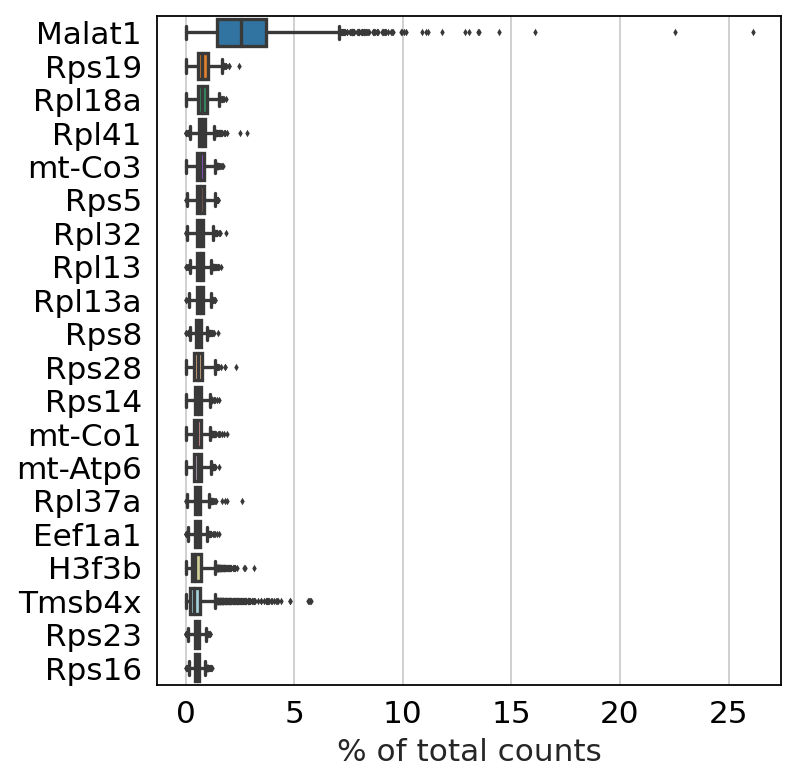

In [93]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [117]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 557 genes that are detected in less than 3 cells


In [118]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

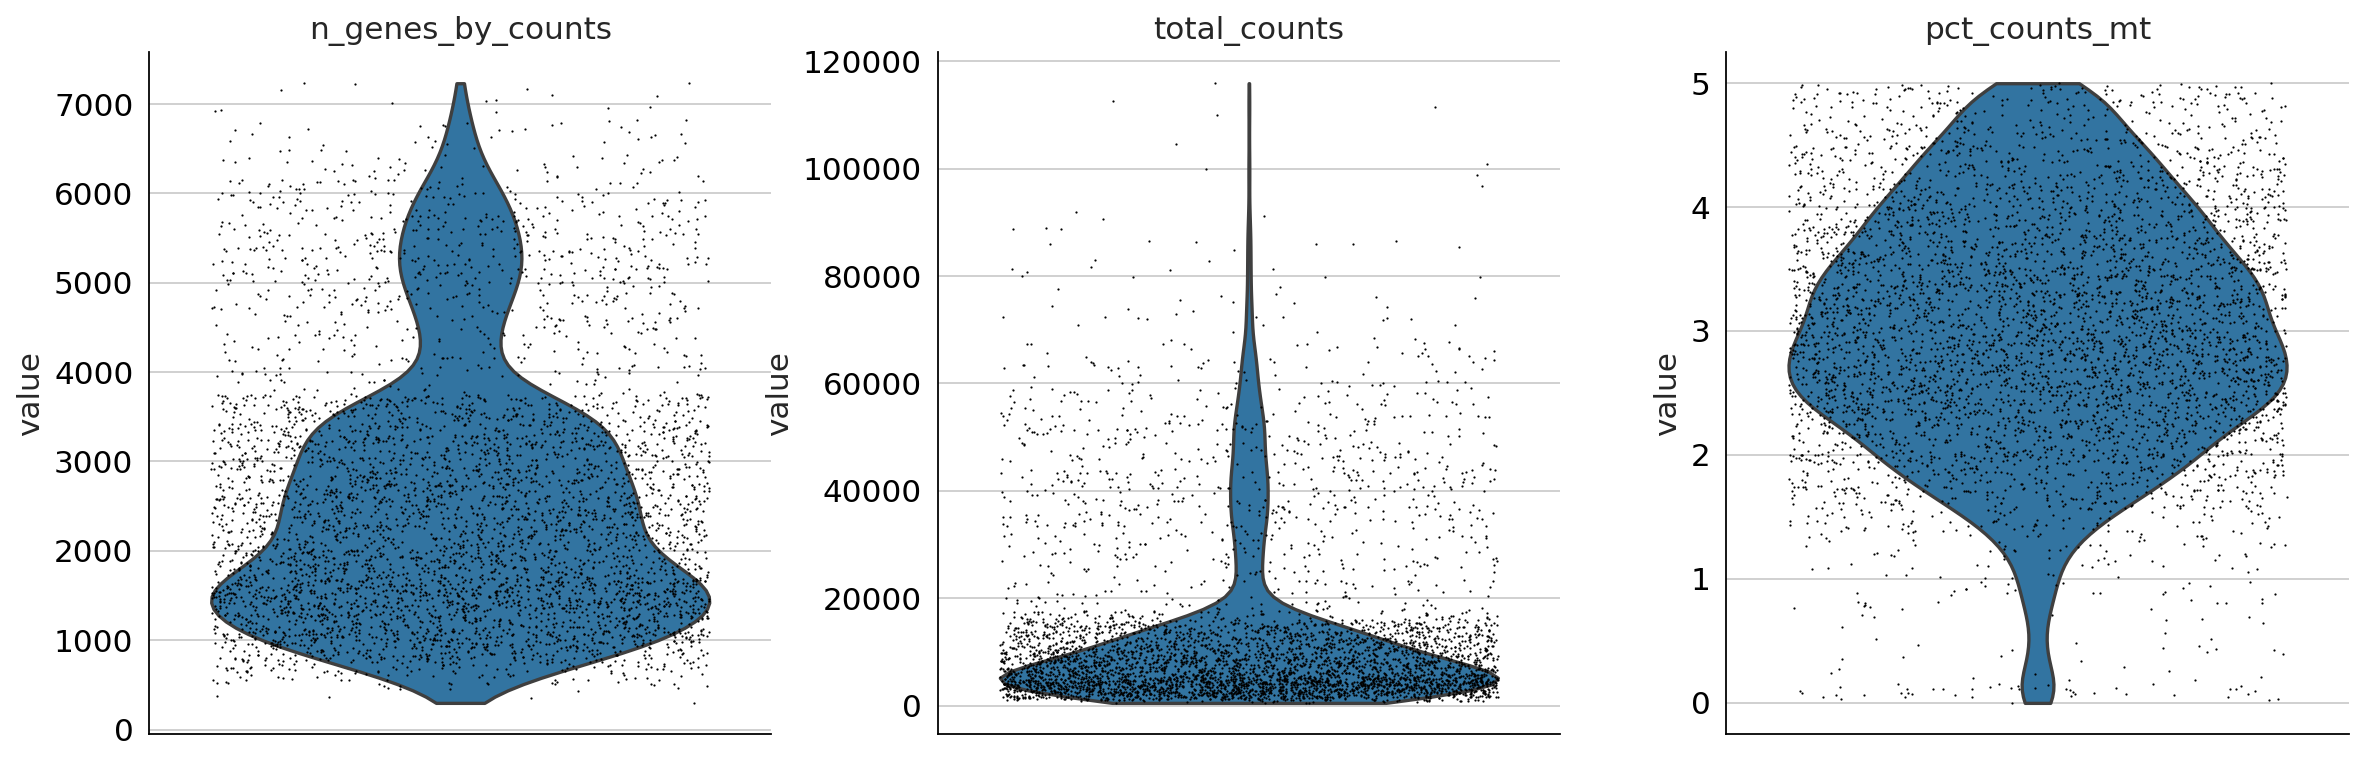

In [119]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [97]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [98]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [99]:
adata = adata[:, adata.var.highly_variable]

In [109]:
adata.var.shape

,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
Xkr4,42,False,42,0.008964,99.124453,43.0,True,0.014807,1.666826,1.823530,0.006118,0.092652
Rrs1,1503,False,1503,0.552220,68.667917,2649.0,True,0.387404,1.152788,0.946342,0.242190,0.451691
Mybl1,52,False,52,0.011882,98.915989,57.0,True,0.016648,1.026189,0.723394,0.008645,0.098642
Vcpip1,775,False,775,0.188660,83.844069,905.0,True,0.171099,0.901671,0.509565,0.104034,0.300372
Cpa6,31,False,31,0.006462,99.353763,31.0,True,0.017635,1.383861,1.337607,0.007762,0.104444
...,...,...,...,...,...,...,...,...,...,...,...,...
Teddm3,475,False,475,0.375443,90.097978,1801.0,True,0.093324,1.353091,1.284768,0.054376,0.213308
Csta1,719,False,719,1.221388,85.011465,5859.0,True,0.276438,1.986713,2.372856,0.127879,0.397749
Stfa2,191,False,191,0.191787,96.018345,920.0,True,0.043671,1.893158,2.212199,0.020926,0.148900
Stfa3,462,False,462,0.490306,90.368981,2352.0,True,0.136914,2.272968,2.864429,0.061127,0.265370


In [110]:
adata.var.shape

(2504, 12)

In [100]:
sc.pp.scale(adata)

/home/meric/Desktop/single-cell-pathway-analysis/venv/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [101]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


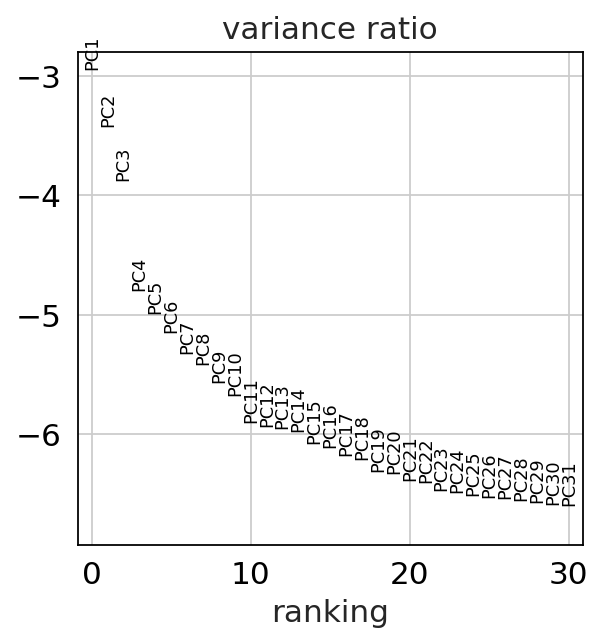

In [81]:
sc.pl.pca_variance_ratio(adata, log=True)

In [102]:
sc.pp.neighbors(adata) # compute nearest neighbors
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


/home/meric/Desktop/single-cell-pathway-analysis/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


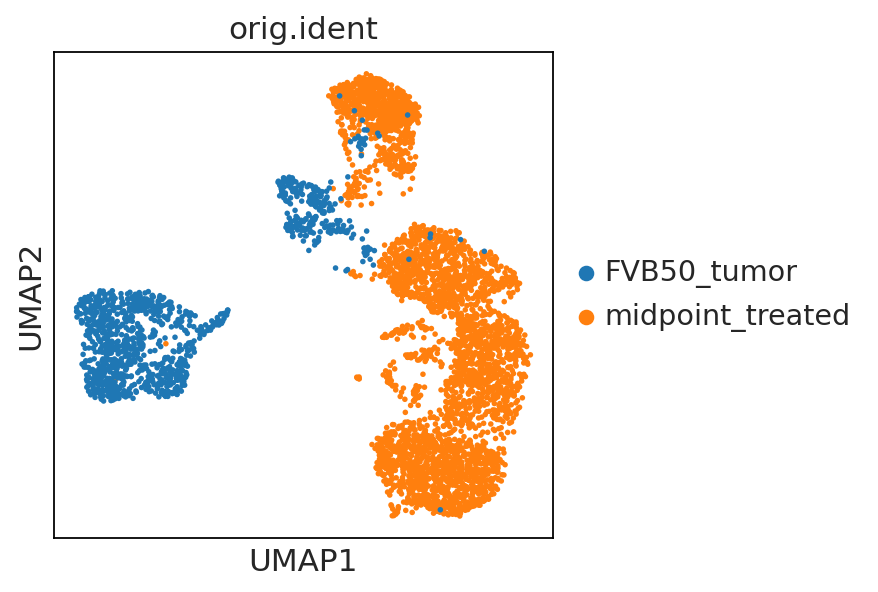

In [103]:
sc.pl.umap(adata, color="orig.ident")

In [106]:
sc.tl.umap(adata,n_components=20)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


/home/meric/Desktop/single-cell-pathway-analysis/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


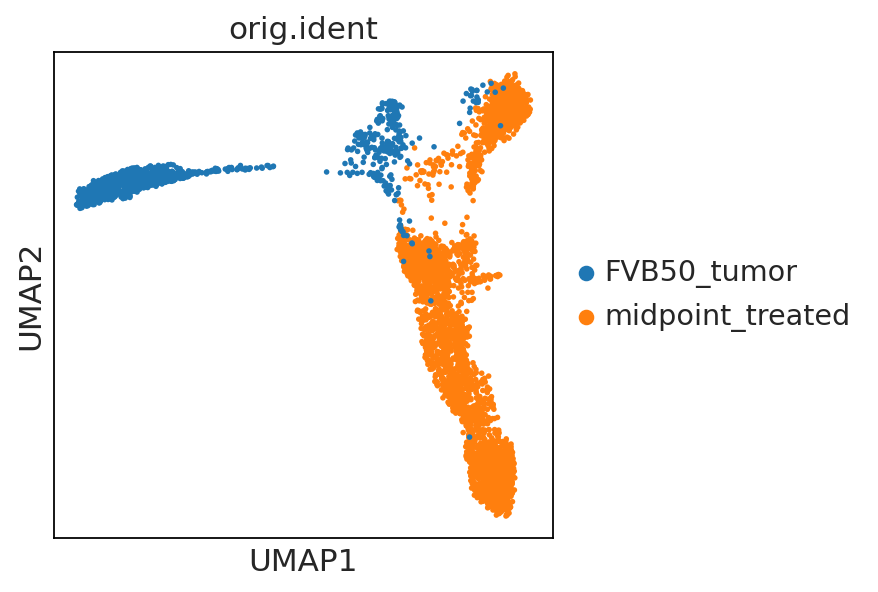

In [107]:
sc.pl.umap(adata, color="orig.ident",)

In [104]:
#sc.pp.neighbors(adata) # compute nearest neighbors
sc.tl.umap(adata,n_components=10)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


/home/meric/Desktop/single-cell-pathway-analysis/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


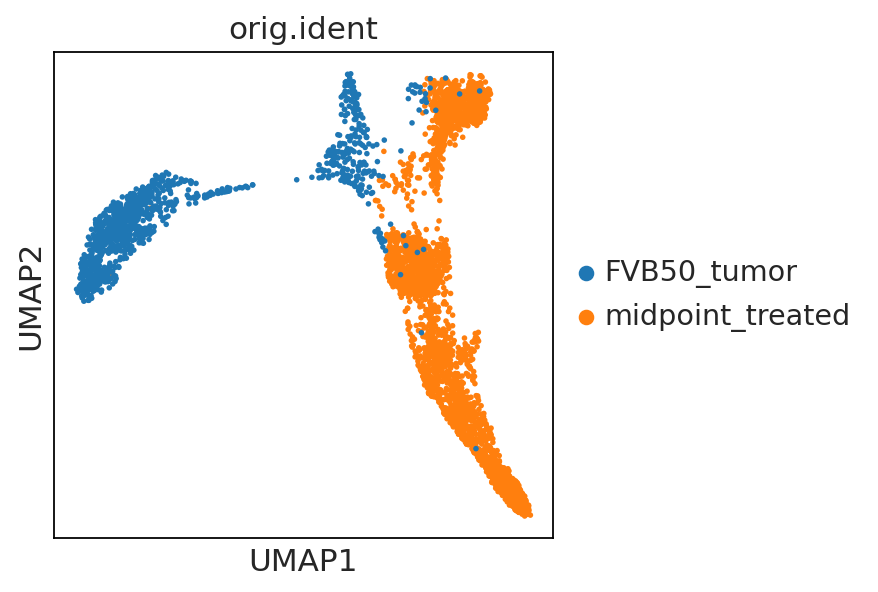

In [105]:
sc.pl.umap(adata, color="orig.ident")

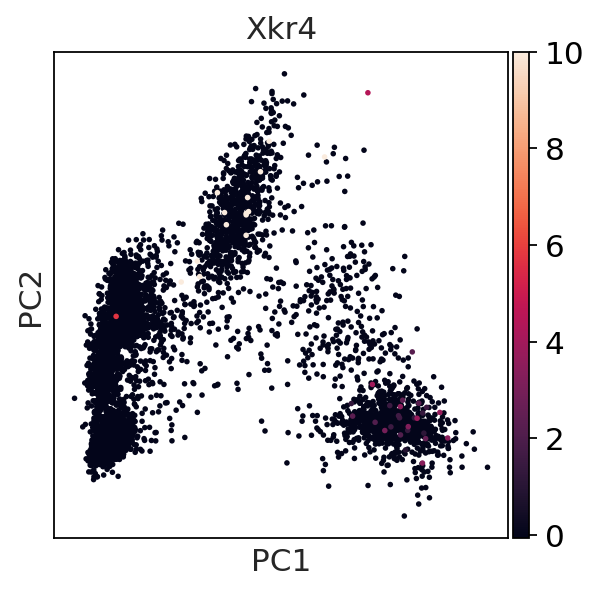

In [53]:
# check genes from the index
# adata.var.index
sc.pl.pca(adata, color='Xkr4')

In [54]:
adata.var

,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
Xkr4,42,False,42,0.008964,99.124453,43.0,True,0.014807,1.666826,1.823530,0.006118,0.092652
Rrs1,1503,False,1503,0.552220,68.667917,2649.0,True,0.387404,1.152788,0.946342,0.242190,0.451691
Mybl1,52,False,52,0.011882,98.915989,57.0,True,0.016648,1.026189,0.723394,0.008645,0.098642
Vcpip1,775,False,775,0.188660,83.844069,905.0,True,0.171099,0.901671,0.509565,0.104034,0.300372
Cpa6,31,False,31,0.006462,99.353763,31.0,True,0.017635,1.383861,1.337607,0.007762,0.104444
...,...,...,...,...,...,...,...,...,...,...,...,...
Teddm3,475,False,475,0.375443,90.097978,1801.0,True,0.093324,1.353091,1.284768,0.054376,0.213308
Csta1,719,False,719,1.221388,85.011465,5859.0,True,0.276438,1.986713,2.372856,0.127879,0.397749
Stfa2,191,False,191,0.191787,96.018345,920.0,True,0.043671,1.893158,2.212199,0.020926,0.148900
Stfa3,462,False,462,0.490306,90.368981,2352.0,True,0.136914,2.272968,2.864429,0.061127,0.265370


In [87]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [58]:
!pip3 install leidenalg

     |████████████████████████████████| 1.3 MB 6.8 MB/s            
     |████████████████████████████████| 3.3 MB 79.6 MB/s            
You should consider upgrading via the '/home/meric/Desktop/single-cell-pathway-analysis/venv/bin/python -m pip install --upgrade pip' command.


In [59]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/home/meric/Desktop/single-cell-pathway-analysis/venv/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


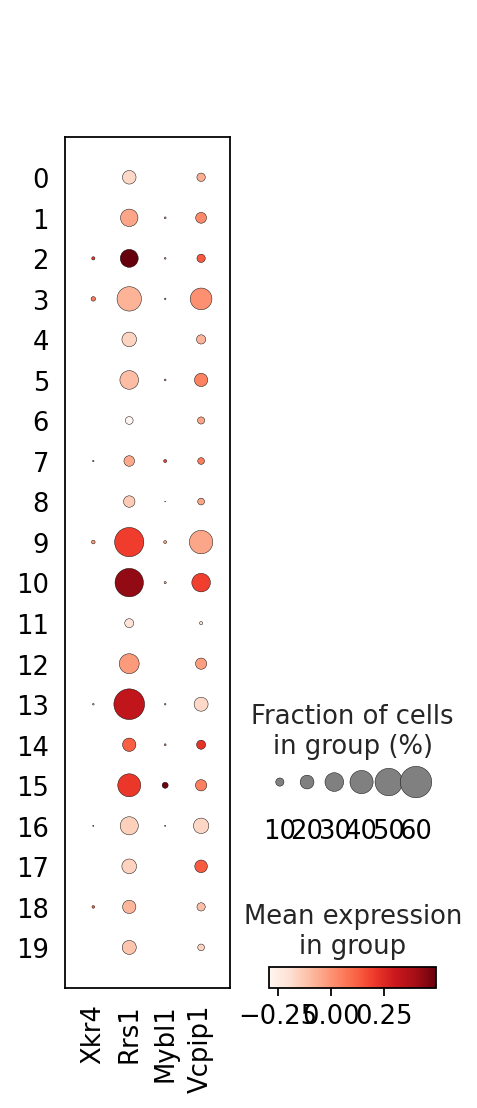

In [60]:
sc.pl.dotplot(adata, adata.var_names[0:4], groupby="leiden", color_map="Reds")

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


/home/meric/Desktop/single-cell-pathway-analysis/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


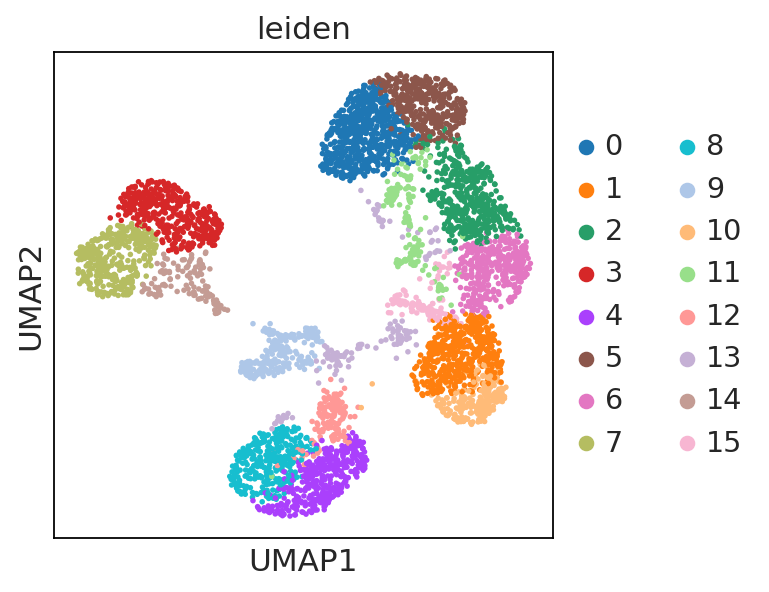

In [88]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['leiden'])

/home/meric/Desktop/single-cell-pathway-analysis/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


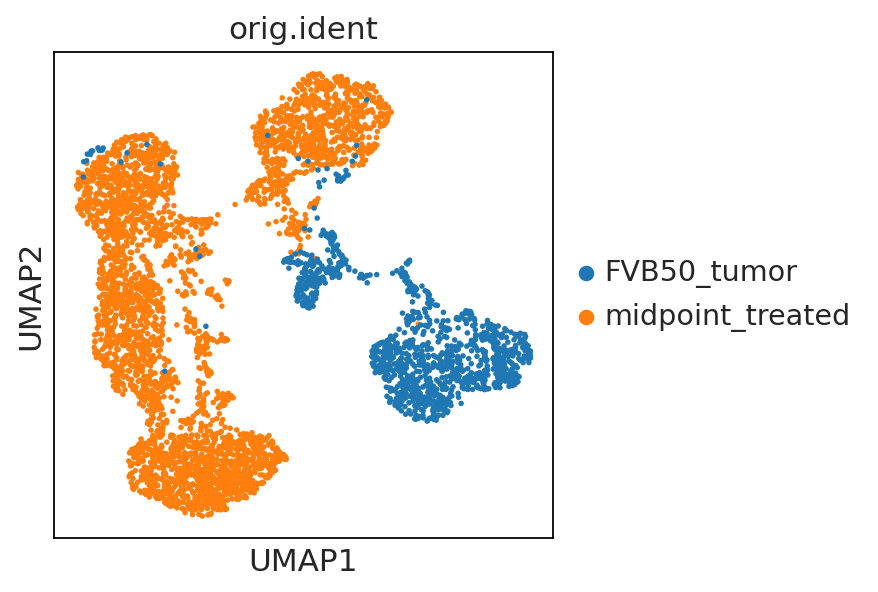

In [64]:
sc.pl.umap(adata, color=['orig.ident'])

/home/meric/Desktop/single-cell-pathway-analysis/venv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


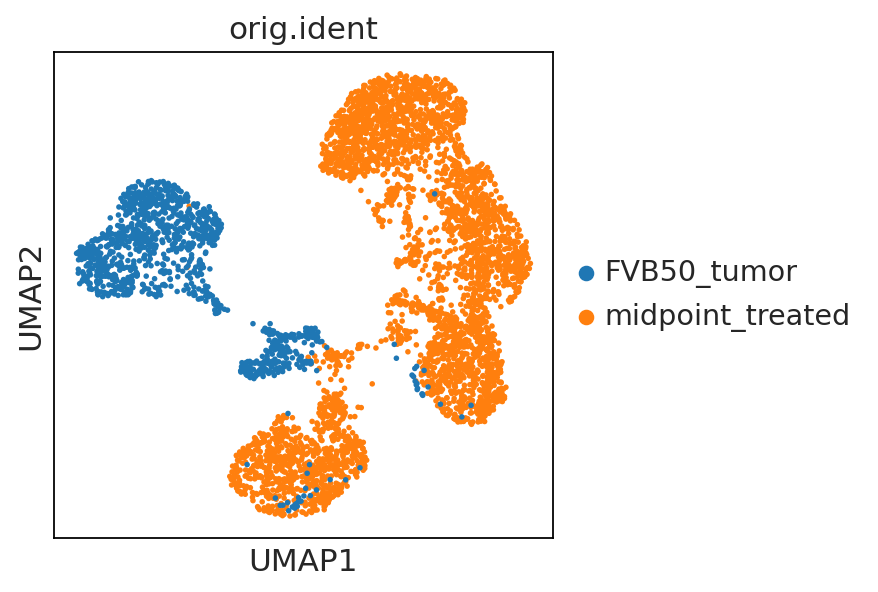

In [89]:
sc.pl.umap(adata, color=['orig.ident'])

In [111]:
adata.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,RNA_snn_res.0.3,RNA_snn_res.0.5,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
midpoint_AAACCTGCACCCAGTG-1,midpoint_treated,2273,1042,4.047514,3.0,1,NaN,1,1042,1042,2273.0,0.0,0.0
midpoint_AAACCTGCAGCTTAAC-1,midpoint_treated,2644,1036,3.933434,3.0,1,NaN,1,1036,1036,2644.0,0.0,0.0
midpoint_AAACCTGGTGTGCGTC-1,midpoint_treated,8506,2325,4.067717,9.0,7,NaN,7,2325,2325,8506.0,0.0,0.0
midpoint_AAACCTGGTTGAACTC-1,midpoint_treated,8249,2394,2.691235,2.0,3,NaN,3,2394,2394,8249.0,0.0,0.0
midpoint_AAACGGGAGGATGGTC-1,midpoint_treated,4295,1505,2.281723,1.0,0,NaN,0,1505,1505,4295.0,0.0,0.0


In [112]:
adata.obs.pct_counts_mt

midpoint_AAACCTGCACCCAGTG-1    0.0
midpoint_AAACCTGCAGCTTAAC-1    0.0
midpoint_AAACCTGGTGTGCGTC-1    0.0
midpoint_AAACCTGGTTGAACTC-1    0.0
midpoint_AAACGGGAGGATGGTC-1    0.0
                              ... 
tumor_TTTCCTCGTATGCTTG-1       0.0
tumor_TTTGCGCCACGGTTTA-1       0.0
tumor_TTTGGTTCAGCCTGTG-1       0.0
tumor_TTTGGTTCAGTGAGTG-1       0.0
tumor_TTTGGTTGTGCAACTT-1       0.0
Name: pct_counts_mt, Length: 4797, dtype: float32